<a href="https://colab.research.google.com/github/CidClayQuirino/FailureRatePC130/blob/main/GraficoPython_PC130_ArmCrack_Rev1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Abas encontradas: ['Result', 'Planilha1']
Linhas lidas: 860
Registros com coordenadas: 858


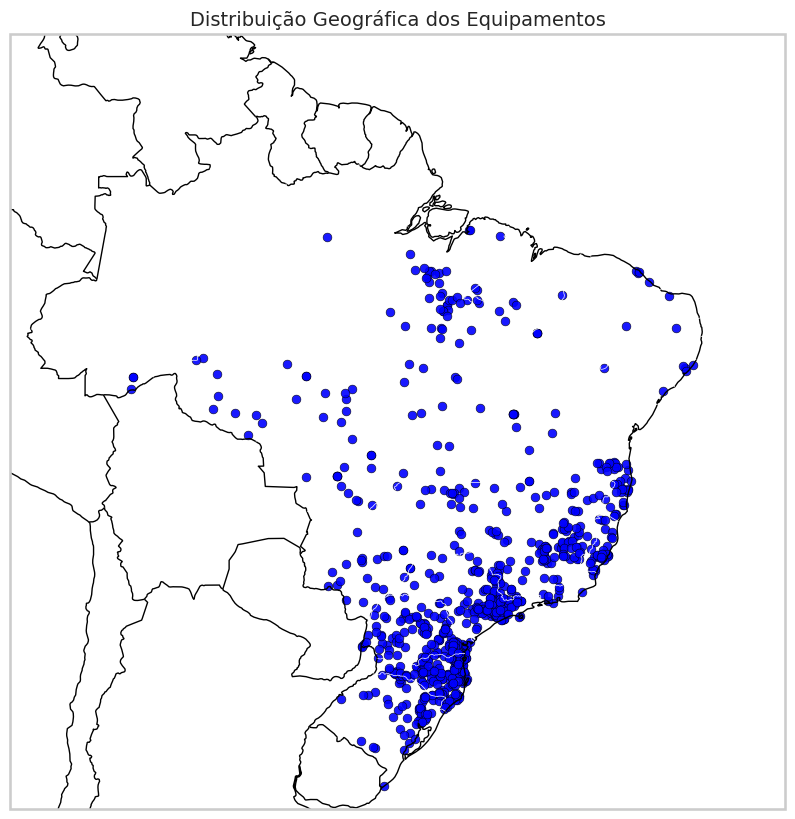

Mapa interativo salvo como: mapa_equipamentos.html


In [15]:
# ==========================================================
#   MAPA DO BRASIL + PONTOS DO ARQUIVO Machinelist.xlsx
#   REMOVIDA QUALQUER RELAÇÃO COM FUEL
# ==========================================================

!pip install cartopy openpyxl folium

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# ==========================================================
# 1) LER ARQUIVO
# ==========================================================

arquivo = "/content/sample_data/Machinelist.xlsx"

abas = pd.ExcelFile(arquivo).sheet_names
print("Abas encontradas:", abas)

df = pd.read_excel(arquivo, sheet_name="Result")
print("Linhas lidas:", len(df))

# ==========================================================
# 2) NORMALIZAR CAMPOS
# ==========================================================

df = df.rename(columns={
    "LAT.": "LAT",
    "LONG.": "LONG"
})

# converter para numérico

df["LAT"] = pd.to_numeric(df["LAT"], errors="coerce")
df["LONG"] = pd.to_numeric(df["LONG"], errors="coerce")

# remover linhas sem coordenadas
df = df.dropna(subset=["LAT", "LONG"])
print("Registros com coordenadas:", len(df))

# ==========================================================
# 3) MAPA ESTÁTICO (CARTOPY)
# ==========================================================

plt.figure(figsize=(10, 12))
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
ax.set_extent([-75, -30, -35, 10], crs=proj)

ax.add_feature(cfeature.BORDERS, linewidth=1)
ax.add_feature(cfeature.COASTLINE, linewidth=1)

states = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none'
)
ax.add_feature(states, linewidth=0.5)

# ==========================================================
# 4) PONTOS (SEM QUALQUER LIGAÇÃO COM FUEL)
# ==========================================================

ax.scatter(
    df["LONG"],
    df["LAT"],
    s=40,
    transform=proj,
    edgecolor="black",
    linewidth=0.4,
    alpha=0.9,
    c="blue"
)

plt.title("Distribuição Geográfica dos Equipamentos", fontsize=14)
plt.show()

# ==========================================================
# 5) MAPA INTERATIVO FOLIUM
# ==========================================================

m = folium.Map(location=[-14.2, -51.9], zoom_start=4)
cluster = MarkerCluster().add_to(m)

# cores por DB

unique_dbs = df["Supporting DB"].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_dbs)))

db_colors = {
    db: "#{:02x}{:02x}{:02x}".format(int(c[0]*255), int(c[1]*255), int(c[2]*255))
    for db, c in zip(unique_dbs, colors)
}

for _, row in df.iterrows():
    color = db_colors.get(row["Supporting DB"], "blue")

    popup = folium.Popup(
        f"<b>Model:</b> {row['Model']}<br>"
        f"<b>Serial:</b> {row['Serial No.']}<br>"
        f"<b>DB:</b> {row['Supporting DB']}<br>"
        f"<b>Altitude:</b> {row['Altitude[m]']} m<br>"
    )

    folium.CircleMarker(
        location=[row["LAT"], row["LONG"]],
        radius=6,
        fill=True,
        color=color,
        fill_color=color,
        fill_opacity=0.9,
        popup=popup
    ).add_to(cluster)

arquivo_mapa = "mapa_equipamentos.html"
m.save(arquivo_mapa)
print("Mapa interativo salvo como:", arquivo_mapa)



Abas encontradas: ['Result', 'Planilha1']
Linhas lidas: 860
Registros com coordenadas: 858


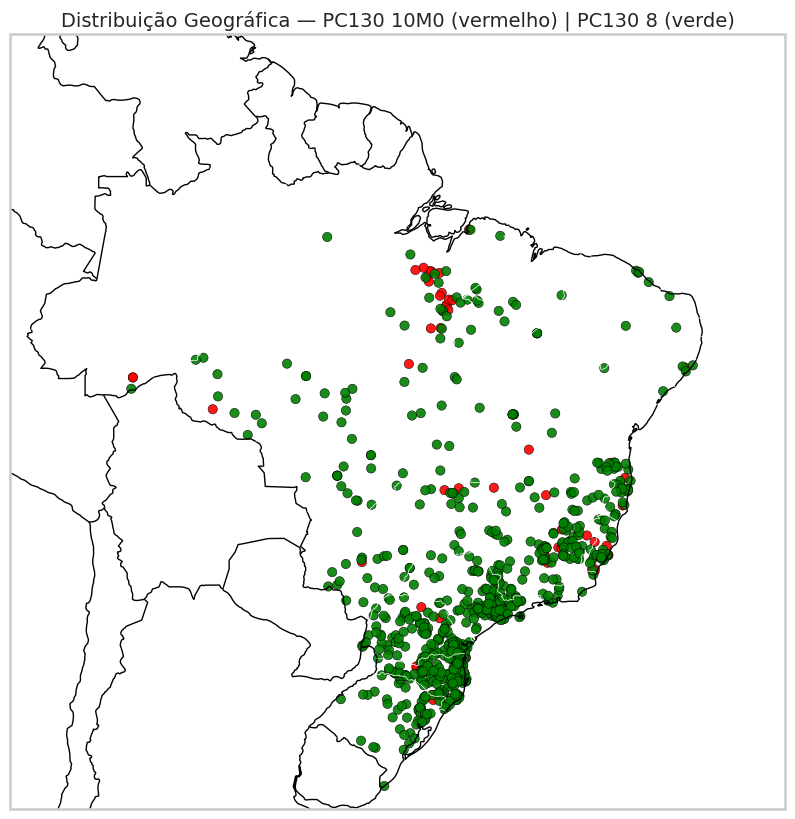

Mapa interativo salvo como: mapa_modelos.html
Cores utilizadas:
 - PC130 10M0 = vermelho
 - PC130 8    = verde
 - Outros     = cinza


In [16]:
# ==========================================================
#   MAPA DO BRASIL + PONTOS DO ARQUIVO Machinelist.xlsx
#   AGORA COLORINDO POR MODELO:
#   PC130 10M0 = VERMELHO
#   PC130 8    = VERDE
#   OUTROS     = CINZA
# ==========================================================

!pip install cartopy openpyxl folium

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# ==========================================================
# 1) LER ARQUIVO
# ==========================================================

arquivo = "/content/sample_data/Machinelist.xlsx"

abas = pd.ExcelFile(arquivo).sheet_names
print("Abas encontradas:", abas)

df = pd.read_excel(arquivo, sheet_name="Result")
print("Linhas lidas:", len(df))

# ==========================================================
# 2) NORMALIZAR CAMPOS
# ==========================================================

df = df.rename(columns={
    "LAT.": "LAT",
    "LONG.": "LONG"
})

df["LAT"] = pd.to_numeric(df["LAT"], errors="coerce")
df["LONG"] = pd.to_numeric(df["LONG"], errors="coerce")

df = df.dropna(subset=["LAT", "LONG"])
print("Registros com coordenadas:", len(df))

# Criar coluna Model_Type
df["Model_Type"] = df["Model"].astype(str) + " " + df["Type"].astype(str)

# Modelos solicitados
modelo_1 = "PC130 10M0"
modelo_2 = "PC130 8"

# Cores por modelo
def cor_por_modelo(model_type):
    if model_type == modelo_1:
        return "red"
    elif model_type == modelo_2:
        return "green"
    else:
        return "gray"

df["color"] = df["Model_Type"].apply(cor_por_modelo)

# ==========================================================
# 3) MAPA ESTÁTICO (CARTOPY)
# ==========================================================

plt.figure(figsize=(10, 12))
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
ax.set_extent([-75, -30, -35, 10], crs=proj)

ax.add_feature(cfeature.BORDERS, linewidth=1)
ax.add_feature(cfeature.COASTLINE, linewidth=1)

states = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none'
)
ax.add_feature(states, linewidth=0.5)

# PLOTANDO COM CORES POR MODELO
ax.scatter(
    df["LONG"],
    df["LAT"],
    s=45,
    transform=proj,
    edgecolor="black",
    linewidth=0.4,
    alpha=0.9,
    c=df["color"]
)

plt.title("Distribuição Geográfica — PC130 10M0 (vermelho) | PC130 8 (verde)", fontsize=14)
plt.show()

# ==========================================================
# 4) MAPA INTERATIVO FOLIUM
# ==========================================================

m = folium.Map(location=[-14.2, -51.9], zoom_start=4)
cluster = MarkerCluster().add_to(m)

for _, row in df.iterrows():

    popup = folium.Popup(
        f"<b>Model:</b> {row['Model']}<br>"
        f"<b>Type:</b> {row['Type']}<br>"
        f"<b>Model_Type:</b> {row['Model_Type']}<br>"
        f"<b>Serial:</b> {row['Serial No.']}<br>"
        f"<b>DB:</b> {row['Supporting DB']}<br>"
        f"<b>Altitude:</b> {row['Altitude[m]']} m<br>"
    )

    folium.CircleMarker(
        location=[row["LAT"], row["LONG"]],
        radius=6,
        fill=True,
        color=row["color"],
        fill_color=row["color"],
        fill_opacity=0.9,
        popup=popup
    ).add_to(cluster)

arquivo_mapa = "mapa_modelos.html"
m.save(arquivo_mapa)

print("Mapa interativo salvo como:", arquivo_mapa)
print("Cores utilizadas:")
print(" - PC130 10M0 = vermelho")
print(" - PC130 8    = verde")
print(" - Outros     = cinza")



In [ ]:
# ============================================
# Mapa do Brasil — Falhas em Campo (Komatsu PSSR)
# Filtro dinâmico por Supporting DB (mapa + gráfico na tela)
# Camada dos Estados via geobr (fallback: contorno do país via geopandas)
# ============================================

# 1) Dependências
try:
    import folium
except ImportError:
    !pip install folium

try:
    import openpyxl
except ImportError:
    !pip install openpyxl

# Geopandas + stack (para contornos)
try:
    import geopandas as gpd
except Exception:
    !pip install --quiet geopandas shapely pyproj fiona rtree
    import geopandas as gpd

# geobr (Estados IBGE)
try:
    import geobr
except Exception:
    !pip install --quiet geobr
    import geobr

import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
import seaborn as sns
from folium.plugins import MarkerCluster
from IPython.display import display, clear_output, HTML
import ipywidgets as widgets

# Ativar widgets no Colab (quando necessário)
try:
    from google.colab import output
    output.enable_custom_widget_manager()
except Exception:
    pass


# ============================================
# CSS PARA AUMENTAR ÁREA DO MAPA
# ============================================
display(HTML("""
<style>
.output_map_container .output_subarea {
    width: 150% !important;
    max-width: 150% !important;
}

/* Altura maior do iframe onde o Folium renderiza o mapa */
iframe {
    height: 1000px !important;
}
</style>
"""))


# -------------------------
# 2) Configurações
# -------------------------
DATA_PATH = "/content/sample_data/Machinelist.xlsx"
expected_cols = ["Model", "Type", "Serial No.", "Supporting DB", "LAT.", "LONG.", "Altitude[m]", "Event Time"]


# -------------------------
# 3) Funções auxiliares
# -------------------------
def to_float_from_br(value):
    if pd.isna(value):
        return np.nan
    if isinstance(value, (float, int)):
        return float(value)
    s = str(value).strip().replace(" ", "")
    parts = s.split(",")
    if len(parts) == 2:
        s = s.replace(".", "")
        s = s.replace(",", ".")
    return pd.to_numeric(s, errors="coerce")

def find_header_row(df_preview, expected_set):
    for i in range(min(30, len(df_preview))):
        row = df_preview.iloc[i].astype(str).str.strip().tolist()
        row_lower = [r.lower() for r in row]
        exp_lower = [e.lower() for e in expected_set]
        match_count = sum(1 for e in exp_lower if e in row_lower)
        if match_count >= max(4, len(exp_lower)//2):
            return i
    return None


# -------------------------
# 4) Leitura robusta da planilha
# -------------------------
xls = pd.ExcelFile(DATA_PATH, engine="openpyxl")
print("Abas encontradas:", xls.sheet_names)

df_final = None
sheet_used = None
header_row_used = None

for sheet in xls.sheet_names:

    try:
        df_try = pd.read_excel(DATA_PATH, sheet_name=sheet, engine="openpyxl")
        cols = [c.strip() for c in df_try.columns]
        if all(c in cols for c in expected_cols):
            df_final = df_try.copy()
            sheet_used = sheet
            header_row_used = 0
            break
    except Exception:
        pass

    df_no_header = pd.read_excel(DATA_PATH, sheet_name=sheet, header=None, engine="openpyxl")
    header_idx = find_header_row(df_no_header, expected_cols)
    if header_idx is not None:
        df_try2 = pd.read_excel(DATA_PATH, sheet_name=sheet, header=header_idx, engine="openpyxl")
        cols2 = [c.strip() for c in df_try2.columns]
        if all(c in cols2 for c in expected_cols):
            df_final = df_try2.copy()
            sheet_used = sheet
            header_row_used = header_idx
            break

if df_final is None:
    print("\nNão foi possível localizar as colunas esperadas em nenhuma aba.")
    preview = pd.read_excel(DATA_PATH, sheet_name=xls.sheet_names[0], header=None, engine="openpyxl")
    print(preview.head(10))
    raise ValueError(f"Colunas esperadas não foram encontradas: {expected_cols}")

print(f"✅ Leitura ok na aba: '{sheet_used}', header na linha: {header_row_used}")


# -------------------------
# 5) Normalização e conversões
# -------------------------
df_final.columns = [c.strip() for c in df_final.columns]

df_final["Latitude"]  = df_final["LAT."].apply(to_float_from_br)
df_final["Longitude"] = df_final["LONG."].apply(to_float_from_br)
df_final["Altitude"]  = pd.to_numeric(df_final["Altitude[m]"].apply(to_float_from_br), errors="coerce")
df_final["Event Time"] = pd.to_datetime(df_final["Event Time"], dayfirst=True, errors="coerce")

df_final = df_final.dropna(subset=["Latitude", "Longitude"]).copy()

mask_br = (
    (df_final["Latitude"]  >= -33.7) & (df_final["Latitude"]  <= 5.3) &
    (df_final["Longitude"] >= -73.9) & (df_final["Longitude"] <= -34.8)
)
df_final = df_final[mask_br].copy()

df_final["Altitude"] = df_final["Altitude"].fillna(0)
df_final.loc[df_final["Altitude"] < -3000, "Altitude"] = np.nan
df_final.loc[df_final["Altitude"] > 9000,  "Altitude"] = np.nan
df_final["Altitude"] = df_final["Altitude"].fillna(df_final["Altitude"].median())

df_final["MachineKey"] = (
    df_final["Model"].astype(str).str.strip() + " | " +
    df_final["Type"].astype(str).str.strip()  + " | " +
    df_final["Serial No."].astype(str).str.strip()
)

supporting_values_all = sorted(df_final["Supporting DB"].astype(str).unique())
palette = sns.color_palette("tab20", n_colors=max(10, len(supporting_values_all)))
color_map = {
    sv: f'#{int(r*255):02x}{int(g*255):02x}{int(b*255):02x}'
    for sv, (r, g, b) in zip(supporting_values_all, palette)
}


# -------------------------
# 6) Estados via geobr
# -------------------------
gdf_states = None
try:
    gdf_states = geobr.read_state(year=2020)
    if gdf_states.crs is None:
        gdf_states.set_crs(epsg=4674, inplace=True)
    gdf_states = gdf_states.to_crs(epsg=4326)
    print("✅ Estados carregados via geobr.")
except Exception as e:
    print(f"⚠️ geobr indisponível: {e}")
    try:
        world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")).to_crs(epsg=4326)
        gdf_states = world[world["name"] == "Brazil"]
    except:
        gdf_states = None

state_name_col = None
if gdf_states is not None:
    for cand in ["name_state", "name", "NM_ESTADO", "abbrev_state", "abbr_state", "sigla", "state", "uf"]:
        if cand in gdf_states.columns:
            state_name_col = cand
            break


# -------------------------
# 7) Função do mapa (ajustada)
# -------------------------
def make_folium_map(df):

    m = folium.Map(
        location=[-15.8, -47.9],
        zoom_start=4,
        width="100%",
        height="750px"  # <<< mapa grande
    )

    if gdf_states is not None:
        folium.GeoJson(
            gdf_states,
            name="Estados",
            style_function=lambda x: {
                "fillColor": "#00000000",
                "color": "#555555",
                "weight": 1.0,
                "opacity": 0.8
            },
            tooltip=folium.GeoJsonTooltip(
                fields=[state_name_col] if state_name_col else None,
                aliases=["Estado:"] if state_name_col else None
            )
        ).add_to(m)

    cluster = MarkerCluster().add_to(m)

    for _, row in df.iterrows():
        lat = row["Latitude"]
        lon = row["Longitude"]
        supp = str(row["Supporting DB"])
        cor = color_map.get(supp, "blue")

        popup_text = (
            f"<b>Model:</b> {row['Model']}<br>"
            f"<b>Type:</b> {row['Type']}<br>"
            f"<b>Serial:</b> {row['Serial No.']}<br>"
            f"<b>Supporting DB:</b> {supp}<br>"
            f"<b>Altitude:</b> {row['Altitude']} m"
        )

        folium.CircleMarker(
            location=[lat, lon],
            radius=6,
            color=cor,
            fill=True,
            fill_color=cor,
            fill_opacity=0.9,
            popup=popup_text
        ).add_to(cluster)

    legend_html = """
    <div style="
        position: fixed;
        bottom: 30px;
        left: 30px;
        z-index: 9999;
        background-color: white;
        padding: 10px;
        border-radius: 8px;
        box-shadow: 0 0 8px rgba(0,0,0,0.3);
        font-size: 14px;
    ">
        <b>Legenda — Supporting DB:</b><br>
    """

    for sv in supporting_values_all:
        legend_html += f"""
            <div style="display:flex; align-items:center; gap:6px;">
                <div style="width:14px; height:14px; background:{color_map[sv]};"></div>
                {sv}
            </div>
        """

    legend_html += "</div>"

    m.get_root().html.add_child(folium.Element(legend_html))
    return m


# -------------------------
# 8) Widgets
# -------------------------
supporting_options = supporting_values_all

multi_db = widgets.SelectMultiple(
    options=supporting_options,
    value=tuple(supporting_options),
    description="Supporting DB",
    rows=min(12, len(supporting_options)),
)

btn_apply = widgets.Button(description="Aplicar filtro", button_style="primary")
btn_clear = widgets.Button(description="Selecionar todos", button_style="success")


# >>>>>>>>>> ÁREA DO MAPA MAIOR
out_map = widgets.Output(layout={'width': '100%'})
out_map.add_class("output_map_container")

out_plot = widgets.Output(layout={'width': '45%'})


def apply_filter(_=None):
    selected = list(multi_db.value)
    df_filtered = df_final[df_final["Supporting DB"].astype(str).isin(selected)].copy()

    with out_map:
        clear_output(wait=True)
        if len(df_filtered) == 0:
            display(widgets.HTML("<b>Nenhum Supporting DB selecionado.</b>"))
        else:
            m = make_folium_map(df_filtered)
            display(m)

    with out_plot:
        clear_output(wait=True)
        if len(df_filtered) == 0:
            display(widgets.HTML("<b>Nenhum Supporting DB selecionado para gráfico.</b>"))
        # else:
        #     make_static_plot(df_filtered)


def select_all(_=None):
    multi_db.value = tuple(supporting_options)


multi_db.observe(lambda change: (apply_filter() if change["name"] == "value" else None), names="value")
btn_apply.on_click(apply_filter)
btn_clear.on_click(select_all)


# Layout
controls = widgets.HBox([multi_db, widgets.VBox([btn_apply, btn_clear])])
display(HTML("<h4>Filtro dinâmico — exibir pontos no mapa e gráfico por Supporting DB</h4>"))
display(controls)

display(widgets.HBox([out_map, out_plot]))

apply_filter()


Abas encontradas: ['Result', 'Planilha1']
✅ Leitura ok na aba: 'Result', header na linha: 0
✅ Estados carregados via geobr.


In [ ]:
# ============================================
# Taxa de falhas (%) por Supporting DB (Distributor)
# Fonte: /content/sample_data/KBI TSI - PC130-10M0 failures.xlsx
# Filtros: Distributor, Full Model, Serial Number, Component Name
# ============================================

# 1) Dependências
try:
    import openpyxl
except ImportError:
    !pip install openpyxl

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output

# Ativar widgets no Colab (quando necessário)
try:
    from google.colab import output
    output.enable_custom_widget_manager()
except Exception:
    pass

# -------------------------
# 2) Configurações
# -------------------------
DATA_PATH = "/content/sample_data/KBITSI.xlsx"
FROTA_NACIONAL = 841  # base para taxa de falhas (%)

expected_cols = [
    "Distributor",
    "Full Model",
    "Serial Number",
    "Component Name",
    "Failure SMR",
]

# -------------------------
# 3) Funções auxiliares
# -------------------------
import re

def clean_colname(name):
    """Remove espaços, quebras de linha e normaliza nomes de colunas."""
    if name is None:
        return ""
    s = str(name)
    s = re.sub(r'[\r\n]+', ' ', s)
    s = s.strip()
    mapping = {
        "Serial Number": "Serial Number",
        "Full Model": "Full Model",
        "Distributor": "Distributor",
        "Component Name": "Component Name",
        "Failure SMR": "Failure SMR",
    }
    s_low = s.lower()
    for k in mapping.keys():
        if s_low == k.lower():
            return mapping[k]
    return s

def to_float_from_br(value):
    if pd.isna(value):
        return np.nan
    if isinstance(value, (float, int)):
        return float(value)
    s = str(value).strip().replace(" ", "")
    parts = s.split(",")
    if len(parts) == 2:
        s = s.replace(".", "")
        s = s.replace(",", ".")
    return pd.to_numeric(s, errors="coerce")

def find_header_row(df_preview, expected_set):
    for i in range(min(30, len(df_preview))):
        row = df_preview.iloc[i].astype(str).str.strip().tolist()
        row_clean = [clean_colname(r) for r in row]
        exp_lower = [e.lower() for e in expected_set]
        match_count = sum(1 for e in exp_lower if e in [rc.lower() for rc in row_clean])
        if match_count >= max(3, len(exp_lower)//2):
            return i
    return None

# -------------------------
# 4) Leitura da planilha
# -------------------------
xls = pd.ExcelFile(DATA_PATH, engine="openpyxl")
print("Abas encontradas:", xls.sheet_names)

df_fail = None
sheet_used = None
header_row_used = None

for sheet in xls.sheet_names:
    try:
        df_try = pd.read_excel(DATA_PATH, sheet_name=sheet, engine="openpyxl")
        df_try.columns = [clean_colname(c) for c in df_try.columns]
        if all(c in df_try.columns for c in expected_cols):
            df_fail = df_try.copy()
            sheet_used = sheet
            header_row_used = 0
            break
    except Exception:
        pass

    df_no_header = pd.read_excel(DATA_PATH, sheet_name=sheet, header=None, engine="openpyxl")
    header_idx = find_header_row(df_no_header, expected_cols)
    if header_idx is not None:
        df_try2 = pd.read_excel(DATA_PATH, sheet_name=sheet, header=header_idx, engine="openpyxl")
        df_try2.columns = [clean_colname(c) for c in df_try2.columns]
        if all(c in df_try2.columns for c in expected_cols):
            df_fail = df_try2.copy()
            sheet_used = sheet
            header_row_used = header_idx
            break

if df_fail is None:
    print("\nNão foi possível localizar as colunas esperadas.")
    preview = pd.read_excel(DATA_PATH, sheet_name=xls.sheet_names[0], header=None, engine="openpyxl")
    print(preview.head(10))
    raise ValueError(f"Colunas esperadas não foram encontradas: {expected_cols}")

print(f"✅ Leitura ok na aba: '{sheet_used}', header na linha: {header_row_used}")

df_fail.columns = [clean_colname(c) for c in df_fail.columns]

missing = [c for c in expected_cols if c not in df_fail.columns]
if missing:
    raise ValueError(f"Colunas ausentes após normalização: {missing}")

# -------------------------
# 5) Conversões
# -------------------------
df_fail["Failure SMR"] = df_fail["Failure SMR"].apply(to_float_from_br)
df_fail["Supporting DB"] = df_fail["Distributor"].astype(str).str.strip()

for c in ["Full Model", "Serial Number", "Component Name"]:
    df_fail[c] = df_fail[c].astype(str).str.strip()

df_fail = df_fail.dropna(subset=["Supporting DB", "Full Model", "Serial Number"], how="any")

# -------------------------
# 6) Paleta de cores
# -------------------------
supporting_values_all = sorted(df_fail["Supporting DB"].astype(str).unique())
palette = sns.color_palette("tab20", n_colors=max(10, len(supporting_values_all)))
color_map = {
    sv: f'#{int(r*255):02x}{int(g*255):02x}{int(b*255):02x}'
    for sv, (r, g, b) in zip(supporting_values_all, palette)
}

# -------------------------
# 7) Widgets
# -------------------------
w_db = widgets.SelectMultiple(
    options=supporting_values_all,
    value=tuple(supporting_values_all),
    description="Distributor",
    rows=min(10, len(supporting_values_all))
)

full_models = sorted(df_fail["Full Model"].unique())
w_model = widgets.Dropdown(options=["Todos"] + full_models, value="Todos", description="Full Model")

def serial_options(model_sel):
    if model_sel == "Todos":
        return sorted(df_fail["Serial Number"].unique())
    return sorted(df_fail[df_fail["Full Model"] == model_sel]["Serial Number"].unique())

w_serial = widgets.Dropdown(options=["Todos"] + serial_options("Todos"), value="Todos", description="Serial Number")

components = sorted(df_fail["Component Name"].unique())
w_comp = widgets.Dropdown(options=["Todos"] + components, value="Todos", description="Component Name")

w_metric = widgets.ToggleButtons(
    options=[("Eventos", "eventos"), ("Máquinas únicas", "unicos")],
    value="eventos",
    description="Cálculo:"
)

btn_apply = widgets.Button(description="Aplicar filtro", button_style="primary")
out_plot = widgets.Output()

def on_model_change(change):
    if change["name"] == "value":
        new_model = change["new"]
        w_serial.options = ["Todos"] + serial_options(new_model)
        w_serial.value = "Todos"

w_model.observe(on_model_change, names="value")

# -------------------------
# 8) Função corrigida (SEM gráfico duplicado)
# -------------------------
def apply_and_plot(_=None):

    selected_dbs = list(w_db.value) if len(w_db.value) > 0 else supporting_values_all
    df_f = df_fail[df_fail["Supporting DB"].astype(str).isin(selected_dbs)].copy()

    if w_model.value != "Todos":
        df_f = df_f[df_f["Full Model"] == w_model.value]
    if w_serial.value != "Todos":
        df_f = df_f[df_f["Serial Number"] == w_serial.value]
    if w_comp.value != "Todos":
        df_f = df_f[df_f["Component Name"] == w_comp.value]

    # Agrupamento
    if w_metric.value == "eventos":
        base = (
            df_f.groupby("Supporting DB")
                .size()
                .rename("Eventos")
                .sort_values(ascending=False)
                .to_frame()
        )
        base["TaxaFalhas_%"] = base["Eventos"] / FROTA_NACIONAL * 100
        ylabel = "Taxa de Falhas (%) — por Eventos"
    else:
        base = (
            df_f.groupby("Supporting DB")["Serial Number"]
                .nunique()
                .rename("MaquinasUnicasComFalha")
                .sort_values(ascending=False)
                .to_frame()
        )
        base["TaxaFalhas_%"] = base["MaquinasUnicasComFalha"] / FROTA_NACIONAL * 100
        ylabel = "Taxa de Falhas (%) — por Máquinas Únicas"

    with out_plot:
        clear_output(wait=True)

        if base.empty:
            display(widgets.HTML("<b>Nenhum dado para os filtros selecionados.</b>"))
            return

        # ----------------------
        # 🔥 GRÁFICO ÚNICO (mantido)
        # ----------------------
        plt.figure(figsize=(18, 7))

        x_labels = base.index.astype(str)
        y_vals = base["TaxaFalhas_%"].values

        bars = plt.bar(
            x_labels,
            y_vals,
            color=[color_map.get(sv, "#666666") for sv in x_labels],
            edgecolor="k",
            linewidth=0.6
        )

        plt.title(f"Taxa de Falhas (%) por Supporting DB\nBase de frota: {FROTA_NACIONAL} máquinas")
        plt.ylabel(ylabel)
        plt.xlabel("Supporting DB (Distributor)")
        plt.grid(True, axis="y", linestyle="--", alpha=0.35)

        plt.xticks(rotation=45, ha='right', fontsize=9)

        for rect, val in zip(bars, y_vals):
            plt.text(rect.get_x() + rect.get_width()/2.0, rect.get_height(),
                     f"{val:.2f}%", ha="center", va="bottom", fontsize=9)

        plt.tight_layout()
        plt.show()

        display(base.round(2))

btn_apply.on_click(apply_and_plot)

# -------------------------
# 9) Interface
# -------------------------
ui_left = widgets.VBox([w_db, w_metric])
ui_right = widgets.VBox([w_model, w_serial, w_comp, btn_apply])

display(widgets.HTML("<h4>Taxa de falhas (%) por Supporting DB (com filtros)</h4>"))
display(widgets.HBox([ui_left, ui_right]))
display(out_plot)

apply_and_plot()


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
# -----------------------------------------
# GRÁFICO 2 — Interativo com legenda
# -----------------------------------------
fig2_inter = go.Figure()

for reg in ['Norte','Nordeste','Centro-Oeste','Sudeste','Sul']:
    sub = trend_region[trend_region['Regiao']==reg].sort_values('SMR_centro')
    if len(sub)==0:
        continue

    fig2_inter.add_trace(go.Scatter(
        x=sub['SMR_centro'],
        y=sub['Taxa_por_100'],
        mode='lines+markers',
        name=reg
    ))

fig2_inter.update_layout(
    title='Taxa de Falhas por Região vs SMR[H] (Interativo)',
    xaxis_title=f"SMR [h] (centro do bin de {SMR_BIN_SIZE}h)",
    yaxis_title=f"Taxa por 100 máquinas (base {FLEET_TOTAL})",
    hovermode="x unified",
)

fig2_inter.show()


In [ ]:
# -----------------------------------------
# GRÁFICO 4 — Interativo
# -----------------------------------------
fig4_inter = go.Figure()

for sup in top_support:
    sub = trend_support[trend_support['Supporting DB']==sup].sort_values('SMR_centro')
    if len(sub)==0:
        continue

    fig4_inter.add_trace(go.Scatter(
        x=sub['SMR_centro'],
        y=sub['Taxa_por_100'],
        mode='lines+markers',
        name=str(sup),
    ))

fig4_inter.update_layout(
    title=f"Top {TOP_N_SUPPORTING} Supporting DB — Taxa por 100 vs SMR (Interativo)",
    xaxis_title=f"SMR [h] (centro do bin de {SMR_BIN_SIZE}h)",
    yaxis_title="Taxa por 100 máquinas",
    hovermode="x unified",
)

fig4_inter.show()
